<a href="https://colab.research.google.com/github/sebinefrancis/Deep-Learning-Exercise/blob/IMDB-Movie-Review-Binary-Classification/IMDB%20Review%20Binary%20Classification/IMDB_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


Because you’re restricting yourself to the top 10,000 most frequent words, no word
**index** will exceed 10,000:

In [0]:
train_data[0]

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

Because you’re restricting yourself to the top 10,000 most frequent words, no word
**index** will exceed 10,000: Here we check for highest number that appear in each review (ie highest index number that appear in each sequence in `train_data`)and then find highest of those highest indices of each review


In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3 , '?') for i in train_data[0]])
print(decoded_review)
#print(reverse_word_index.get(0,'?'))
#print(reverse_word_index.get(14,'?'))
#print(reverse_word_index.get(11,'?'))
#train_data[0]

1646592/1641221 [==============================] - 0s 0us/step
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amaz

The integers represnting indices of words in review are offset by 3 from that of dictionary. Because in review it is considered that 0 = "PADDING" 1="START" and 2="UNKNOWN". If there is 14 in review, it means 14-3 = 11 is the correct word in dictionary. so 14 in review represents 11 in dictionary. 3 in review repsents 0 in dictionary. 4=1, 5=2 AND SO ON. If i = 2 (means "UNKNOWN" in review), 2-3=-1, which is not a valid index for dictionary and our code will place '?' there. So for 0,1,2 in reviw we get a '?'

[Explanation](https://stackoverflow.com/questions/42821330/restore-original-text-from-keras-s-imdb-dataset/44891281)

In [0]:
import numpy as np
# results = np.zeros((2, 5))
# results[1, [1,3]] = 1.
# print(results)
# results = np.zeros((2, 5))
# results[1, [1,1]] = 1. # [1,1] is similar to same word repeated 2 times in review
# print(results)

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) #creates all zero matrix, 
  #with dimensions = 10000 in one axis and equal to number of reviews in other axis
  for i, sequence in enumerate(sequences): #iterate each reviews and corresponding result axis
    results[i, sequence] = 1. #set for each result (i th result), the values in indices
    #corresponding to the sequence(review) value, to 1. So if first review has first value 3,
    # then 3rd indice in first result is 1. So basically this result indicate whether that review
    #contains the word or not (atleast once). Uncomment the code to see it.
    #Sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]

#Now vectorize our labels as well. Just changing data type, and convert to tensor
# our labels are already 0 and 1s.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


The data needs to be modified as numpy tensors. 
You can’t feed lists of integers into a neural network. You have to turn your lists into
tensors. There are two ways to do that:

*   Pad your lists so that they all have the same length, turn them into an integer
tensor of shape (samples, word_indices), and then use as the first layer in
your network a layer capable of handling such integer tensors (the Embedding
layer).
*   One-hot encode your lists to turn them into vectors of 0s and 1s. This would
mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector
that would be all 0s except for indices 3 and 5, which would be 1s. Then you
could use as the first layer in your network a Dense layer, capable of handling
floating-point vector data.

Let’s go with the latter solution to vectorize the data, which you’ll do manually for
maximum clarity.
Now the data is ready to fed into network. 


In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

The 16 in `layers.Dense(16, activation='relu')` is the number of hidden units. We know in a Dense (fully connected) Layer with relu activation, the following tensor operations happens `output = relu(dot(W,input)+b)`. Having 16 hidden units means weight matrix W have shape `(input_dimension,16)`. The dot product with W project the input data into 16 dimesnional representation space (and then adds bias vector and apply relu). 
Having more hidden units (higher dimensional represenntation space) means network can learn more complex representations but it will become computationalm expensive and network will learn unwanted pattersns (patterns that improve performance on training data but not on test data).

There are two key architecture decisions to be made about such a stack of Dense layers:

1.   How many layers to use
2.   How many hidden units to choose for each layer

We’ll learn formal principles to guide you in making these choices. For
the time being, we use following architecture choice:

*   Two intermediate layers with 16 hidden units each
*   A third layer that will output the scalar prediction regarding the sentiment of
the current review

The intermediate layers will use relu as their activation function, and the final layer
will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”: how likely the review is to be
positive). 
 

*   A relu (rectified linear unit) is a function meant to zero out negative values
*   a sigmoid “squashes” arbitrary values into the `[0, 1]` interval outputting something that can be interpreted as a probability.

**Choosing Loss Function and optimizer**

In our case output of network is probability. cross_entropy loss is best for probability outputs. Here we deal with binary classification, so choose binary_crossentropy. 

---
Here’s the step where you configure the model with the rmsprop optimizer and
the binary_crossentropy loss function. Note that you’ll also monitor accuracy
during training.

---
You’re passing your optimizer, loss function, and metrics as strings, which is possible
because rmsprop, binary_crossentropy, and accuracy are packaged as part of Keras.



In [0]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

Sometimes you may want to configure the parameters of your optimizer. This can be done by passing an `optimizer` class instance as the `optimizer` argument as shown below

In [0]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='binary_crossentropy',
metrics=['accuracy'])

A custom loss function or metric function can be
done by passing function objects as the loss and/or metrics arguments as shown below

In [0]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

**Validating your approach**

In order to monitor during training, the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.

In [13]:
x_val = x_train[:10000] #shape of x_train (25000,10000) here x_train[:10000] means split on first axis (ie 
#axis with 25000 as dimension) from 0-10000. The second axis of x_train (axis with 10000 as dimension) is 
#unaffected
partial_x_train = x_train[10000:] # splits the remaining from 10000 till end (25000).
#x_train[10:100,400:500] will split on both axis 0 and axis 1
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
partial_x_train.shape

(15000, 10000)

**Training your model**

You’ll now train the model for 20 epochs (20 iterations over all samples in the
`x_train` and `y_train` tensors), in mini-batches of 512 samples. At the same time,
you’ll monitor loss and accuracy on the 10,000 samples that you set apart. You do so by
passing the validation data as the `validation_data` argument.

In [0]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Note that the call to model.fit() returns a History object. This object has a member
history, which is a dictionary containing data about everything that happened
during training. Let’s look at it:

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

**Visualize metrics of training and validation**

The dictionary contains four entries: one per metric that was being monitored during
training and during validation. In the following two listing, let’s use Matplotlib to plot
the training and validation loss side by side (see figure 3.7), as well as the training and
validation accuracy (see figure 3.8). Note that your own results may vary slightly due to
a different random initialization of your network.

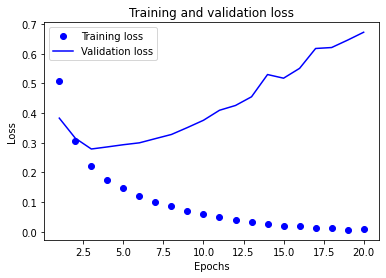

In [16]:
# Training and validation loss

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') #(x_axis,y_axis,style,label)
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

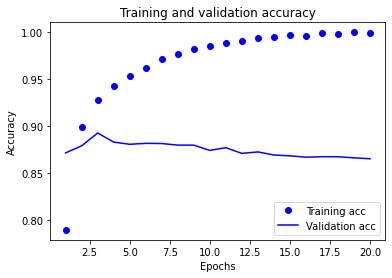

In [17]:
#Training and validation accuracy

plt.clf() #clears the plot
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As you can see, the training loss decreases with every epoch, and the training accuracy
increases with every epoch. That’s what you would expect when running gradientdescent
optimization—the quantity you’re trying to minimize should be less with
every iteration. But that isn’t the case for the validation loss and accuracy: they seem to
peak at the fourth epoch. This is an example of what we warned against earlier: a
model that performs better on the training data isn’t necessarily a model that will do
better on data it has never seen before. In precise terms, what you’re seeing is **overfitting**:
after the second epoch, you’re overoptimizing on the training data, and you end
up learning representations that are specific to the training data and don’t generalize
to data outside of the training set.

In this case, to prevent overfitting, you could stop training after three epochs. In
general, you can use a range of techniques to mitigate overfitting, which we’ll cover in
chapter 4.

Let’s train a new network from scratch for four epochs and then evaluate it on the
test data.

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.4620 - accuracy: 0.8298
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2758 - accuracy: 0.9053
Epoch 3/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2114 - accuracy: 0.9257
Epoch 4/4
25000/25000 [==============================] - 2s 64us/step


[0.28457406826972964, 0.8865200281143188]

After having trained a network, you’ll want to use it in a practical setting. You can generate
the likelihood of reviews being positive by using the predict method:

In [19]:
model.predict(x_test)

array([[0.2644807 ],
       [0.99965775],
       [0.90152365],
       ...,
       [0.14075729],
       [0.09430352],
       [0.624134  ]], dtype=float32)

As you can see, the network is confident for some samples (0.99 or more, or 0.01 or
less) but less confident for others (0.6, 0.4).

**Methods to reduce Overfitting and determine size of network**

From chapter 4,
**1. Reducing networks size**

In [0]:
#Low capacity model small network
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_small = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

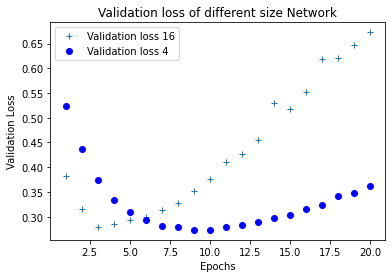

In [21]:
history_dict_small = history_small.history
val_loss_values_small = history_dict_small['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss_values, '+', label='Validation loss 16') #val_loss_values = validation loss of original 16 units model, we have it already
plt.plot(epochs, val_loss_values_small, 'bo', label='Validation loss 4') #val_loss_values = validation loss of small 4 units model, we have it already
plt.title('Validation loss of different size Network')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [0]:
#High capacity model small network
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history_large = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

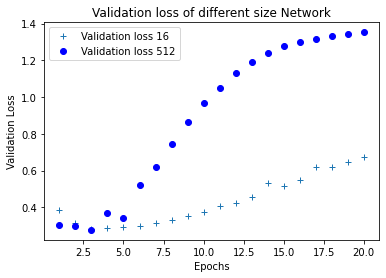

In [23]:
history_dict_large = history_large.history
val_loss_values_large = history_dict_large['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, val_loss_values, '+', label='Validation loss 16') #val_loss_values = validation loss of original 16 units model, we have it already
plt.plot(epochs, val_loss_values_large, 'bo', label='Validation loss 512') #val_loss_values = validation loss of big 512 units model, we have it already
plt.title('Validation loss of different size Network')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

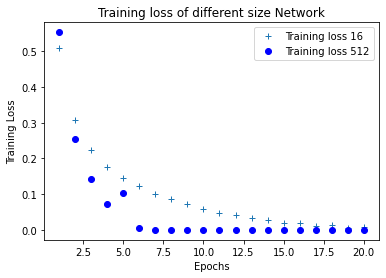

In [24]:
#Training loss comparison 16 and 512 size
history_dict_large = history_large.history
loss_values_large = history_dict_large['loss'] #training loss 512
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, '+', label='Training loss 16') #loss_values = training loss of original 16 units model, we have it already
plt.plot(epochs, loss_values_large, 'bo', label='Training loss 512') #loss_values_large = training loss of big 512 units model, we have it already
plt.title('Training loss of different size Network')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend()
plt.show()